# Python 3 Programming Specialization  
## Course 3: Data Collection and Processing with Python  
### Assignment: Final Course Assignment

**Question 1**  
This project will take you through the process of mashing up data from two different APIs to make movie recommendations. The TasteDive API lets you provide a movie (or bands, TV shows, etc.) as a query input, and returns a set of related items. The OMDB API lets you provide a movie title as a query input and get back data about the movie, including scores from various review sites (Rotten Tomatoes, IMDB, etc.).

You will put those two together. You will use TasteDive to get related movies for a whole list of titles. You’ll combine the resulting lists of related movies, and sort them according to their Rotten Tomatoes scores (which will require making API calls to the OMDB API.)

To avoid problems with rate limits and site accessibility, we have provided a cache file with results for all the queries you need to make to both OMDB and TasteDive. Just use requests_with_caching.get() rather than requests.get(). If you’re having trouble, you may not be formatting your queries properly, or you may not be asking for data that exists in our cache. We will try to provide as much information as we can to help guide you to form queries for which data exists in the cache.

Your first task will be to fetch data from TasteDive. The documentation for the API is at https://tastedive.com/read/api.

Define a function, called get_movies_from_tastedive. It should take one input parameter, a string that is the name of a movie or music artist. The function should return the 5 TasteDive results that are associated with that string; be sure to only get movies, not other kinds of media. It will be a python dictionary with just one key, ‘Similar’.

Try invoking your function with the input “Black Panther”.

HINT: Be sure to include only q, type, and limit as parameters in order to extract data from the cache. If any other parameters are included, then the function will not be able to recognize the data that you’re attempting to pull from the cache. Remember, you will not need an api key in order to complete the project, because all data will be found in the cache.

The cache includes data for the following queries:

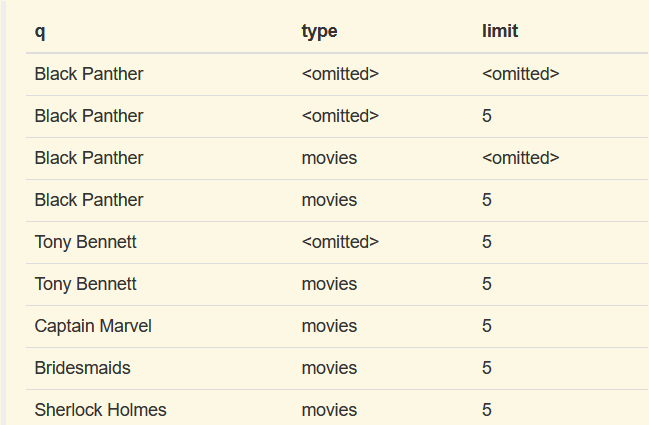

In [ ]:
# Your code here
import requests_with_caching

def get_movies_from_tastedive(name):
    d = {}
    d['q'] = name
    d['type'] = 'movies'
    d['limit'] = 5
    data = requests_with_caching.get("https://tastedive.com/api/similar", params = d)
    movies = data.json()
    
    return movies
    

    
# some invocations that we use in the automated tests; uncomment these if you are getting errors and want better error messages
# get_movies_from_tastedive("Bridesmaids")
# get_movies_from_tastedive("Black Panther")

**Question 2**  
Please copy the completed function from above into this active code window. Next, you will need to write a function that extracts just the list of movie titles from a dictionary returned by get_movies_from_tastedive. Call it extract_movie_titles.

In [ ]:
# Your code here
import requests_with_caching
import json

def get_movies_from_tastedive(name):
    d = {}
    d['q'] = name
    d['type'] = 'movies'
    d['limit'] = 5
    data = requests_with_caching.get("https://tastedive.com/api/similar", params = d)
    movies = data.json()
    
    return movies

def extract_movie_titles(obj):
    output_list = []
    movie_list = obj['Similar']['Results']
    for movie in movie_list:
        output_list.append(movie['Name'])
    return output_list

# some invocations that we use in the automated tests; uncomment these if you are getting errors and want better error messages
# extract_movie_titles(get_movies_from_tastedive("Tony Bennett"))
# extract_movie_titles(get_movies_from_tastedive("Black Panther"))

**Question 3**  
Please copy the completed functions from the two code windows above into this active code window. Next, you’ll write a function, called get_related_titles. It takes a list of movie titles as input. It gets five related movies for each from TasteDive, extracts the titles for all of them, and combines them all into a single list. Don’t include the same movie twice.

In [ ]:
# Your code here
import requests_with_caching
import json

def get_movies_from_tastedive(name):
    d = {}
    d['q'] = name
    d['type'] = 'movies'
    d['limit'] = 5
    data = requests_with_caching.get("https://tastedive.com/api/similar", params = d)
    movies = data.json()
    
    return movies

def extract_movie_titles(obj):
    output_list = []
    movie_list = obj['Similar']['Results']
    for movie in movie_list:
        output_list.append(movie['Name'])
    return output_list

def get_related_titles(movie_list):
    output_list = []
    for movie in movie_list:
        output = extract_movie_titles(get_movies_from_tastedive(movie))
        for o in output:
            if o not in output_list:
                output_list.append(o)
    return output_list


# some invocations that we use in the automated tests; uncomment these if you are getting errors and want better error messages
# get_related_titles(["Black Panther", "Captain Marvel"])
# get_related_titles([])

**Question 4**  
Your next task will be to fetch data from OMDB. The documentation for the API is at https://www.omdbapi.com/

Define a function called get_movie_data. It takes in one parameter which is a string that should represent the title of a movie you want to search. The function should return a dictionary with information about that movie.

Again, use requests_with_caching.get(). For the queries on movies that are already in the cache, you won’t need an api key. You will need to provide the following keys: t and r. As with the TasteDive cache, be sure to only include those two parameters in order to extract existing data from the cache.

In [ ]:
# Your code here
import requests_with_caching

def get_movie_data(name):
    d = {}
    d['t'] = name
    d['r'] = "json"
    req = requests_with_caching.get("http://www.omdbapi.com/", params = d)
    return req.json()
    
# some invocations that we use in the automated tests; uncomment these if you are getting errors and want better error messages
# get_movie_data("Venom")
# get_movie_data("Baby Mama")

**Question 5**  
Please copy the completed function from above into this active code window. Now write a function called get_movie_rating. It takes an OMDB dictionary result for one movie and extracts the Rotten Tomatoes rating as an integer. For example, if given the OMDB dictionary for “Black Panther”, it would return 97. If there is no Rotten Tomatoes rating, return 0.

In [ ]:
# Your code here
import requests_with_caching
import json

def get_movie_data(name):
    d = {}
    d['t'] = name
    d['r'] = "json"
    req = requests_with_caching.get("http://www.omdbapi.com/", params = d)
    return req.json()

def get_movie_rating(obj):
    ratings = obj['Ratings']
    rating_score = 0
    for rating in ratings:
        if rating["Source"] == "Rotten Tomatoes":
            rating_score = int(rating["Value"].split("%")[0])
    return rating_score



# some invocations that we use in the automated tests; uncomment these if you are getting errors and want better error messages
#get_movie_rating(get_movie_data("Deadpool 2"))

**Question 6**  
Now, you’ll put it all together. Don’t forget to copy all of the functions that you have previously defined into this code window. Define a function get_sorted_recommendations. It takes a list of movie titles as an input. It returns a sorted list of related movie titles as output, up to five related movies for each input movie title. The movies should be sorted in descending order by their Rotten Tomatoes rating, as returned by the get_movie_rating function. Break ties in reverse alphabetic order, so that ‘Yahşi Batı’ comes before ‘Eyyvah Eyvah’.

In [ ]:
#Your code here

import requests_with_caching
import json

def get_movies_from_tastedive(name):
    d = {}
    d['q'] = name
    d['type'] = 'movies'
    d['limit'] = 5
    data = requests_with_caching.get("https://tastedive.com/api/similar", params = d)
    movies = data.json()
    
    return movies

def extract_movie_titles(obj):
    output_list = []
    movie_list = obj['Similar']['Results']
    for movie in movie_list:
        output_list.append(movie['Name'])
    return output_list

def get_related_titles(movie_list):
    output_list = []
    for movie in movie_list:
        output = extract_movie_titles(get_movies_from_tastedive(movie))
        for o in output:
            if o not in output_list:
                output_list.append(o)
    return output_list
def get_movie_data(name):
    d = {}
    d['t'] = name
    d['r'] = "json"
    req = requests_with_caching.get("http://www.omdbapi.com/", params = d)
    return req.json()

def get_movie_rating(obj):
    ratings = obj['Ratings']
    rating_score = 0
    for rating in ratings:
        if rating["Source"] == "Rotten Tomatoes":
            rating_score = int(rating["Value"].split("%")[0])
    return rating_score

def get_sorted_recommendations(movie_list):
    related_movies = get_related_titles(movie_list)
    rating_dict = {}
    for movie in related_movies:
        rating_dict[movie] = get_movie_rating(get_movie_data(movie))
    print(rating_dict)
    output_list = sorted(rating_dict, key = lambda x: (rating_dict[x], x), reverse = True)
    return output_list
    
    
# some invocations that we use in the automated tests; uncomment these if you are getting errors and want better error messages
# get_sorted_recommendations(["Bridesmaids", "Sherlock Holmes"])